# Cubic roots and excess surrogate risk

This Jupyter notebook is meant to complement the technical contents of the Appendix of the paper "Classification using margin pursuit", by Matthew J. Holland.

- __The paper:__ a <a href="https://arxiv.org/abs/1810.04863">preprint of the paper</a> is available.

- __The code:__ <a href="https://github.com/feedbackward/catcube">my GitHub repository</a> houses all the code used in this notebook.

In addition to using `git clone` or some similar means to acquire our code, users are assumed to have Python 3.6+, as well as the `numpy` and `matplotlib` packages installed.


__Contents:__

- <a href="#initial">Initial setup</a>

- <a href="#smallgamma">Getting roots, simplest case</a> ($0 < \gamma \leq \sqrt{2}/2$)

- <a href="#largegamma">Getting roots, more complicated case</a> ($\gamma > \sqrt{2}/2$)

- <a href="#Hfn">Actual computation of desired functions</a> ($H$ and $\Psi$)

___


<a id="initial"></a>
## Initial setup

Please see the paper linked above for all formal definitions, they will not be repeated here. Basically, we have a function $\phi(u) = \rho(\gamma - u)$ to be used as a surrogate loss instead of the popular surrogate $\phi(u)=\max(0,1-u)$. If we denote the risk of our surrogate loss as $R_{\phi}$, then following the theory of Bartlett *et al.* (2006), as long as our $\phi$ is "classification calibrated" as a surrogate loss for the 0-1 loss, there exists a function $\Psi$, non-decreasing on the positive real line, such that $\Psi(R(h)-R^{\ast}) \leq R_{\phi}(h) - R_{\phi}^{\ast}$.

The final goal of this demonstration is to actually compute this "linking" function $\Psi$, to give additional empirical insights into how sharp our formal guarantees actually are.

In [1]:
# Preliminary setup.
import helpers as hlp
import math
import numpy as np
import matplotlib.pyplot as plt

# Our scripts.
import getroots as gtrt
import linker as lnk

# Image setup.
saveImages = True
imgDir = "img/"

# Font size setup.
FONTSIZE = "xx-large"

Note that the $\rho$ function used here and its derivatives take the following form:

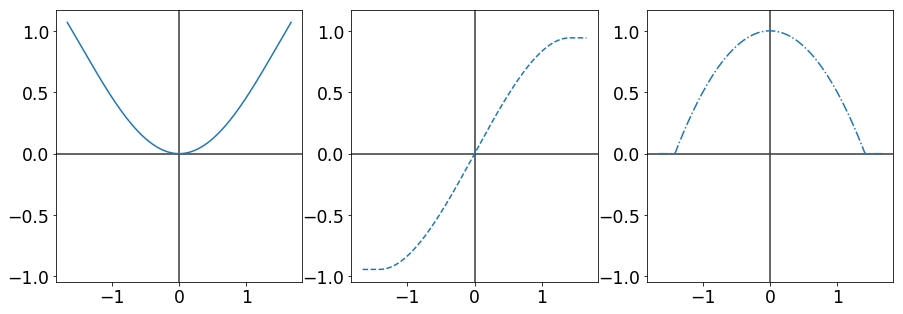

In [2]:
x_range = np.linspace((-math.sqrt(2)-0.25), (math.sqrt(2)+0.25), 250)
y_rho = hlp.rho_catnew(x_range)
y_rho_g = hlp.psi_catnew(x_range)
y_rho_gg = hlp.psi_catnew_deriv(x_range)

myfig = plt.figure(figsize=(15,5))

ax_1 = myfig.add_subplot(1,3,1)
plt.axvline(x=0.0, color="xkcd:dark grey")
plt.axhline(y=0.0, color="xkcd:dark grey")
ax_1.plot(x_range, y_rho, "-")
ax_1.tick_params(labelsize=FONTSIZE)

ax_2 = myfig.add_subplot(1,3,2, sharey=ax_1)
plt.axvline(x=0.0, color="xkcd:dark grey")
plt.axhline(y=0.0, color="xkcd:dark grey")
ax_2.plot(x_range, y_rho_g, "--")
ax_2.tick_params(labelsize=FONTSIZE)

ax_3 = myfig.add_subplot(1,3,3, sharey=ax_2)
plt.axvline(x=0.0, color="xkcd:dark grey")
plt.axhline(y=0.0, color="xkcd:dark grey")
ax_3.plot(x_range, y_rho_gg, "-.")
ax_3.tick_params(labelsize=FONTSIZE)

plt.show()

if saveImages:
    myfig.savefig(imgDir+"rho_psi_deriv.pdf", bbox_inches="tight")

<a id="smallgamma"></a>
## Getting roots, simplest case: $0 < \gamma \leq \sqrt{2}/2$

Let us begin with some plots related to the *double-cube* condition, which is all we'll ever need as long as $\gamma \leq \sqrt{2}/2$. First, we look at how the discriminant of this function depends on $\gamma$ and $\eta$.

Small gamma = 0.1414213562373095
max = -923.791209089676 min = -88739014952.46182
--
Medium gamma = 0.7071067811865476
max = -1222.1605295237487 min = -117400252824.0
--
Large gamma = 0.6071067811865476
max = -1193.3880176915707 min = -114636376817.63322
--


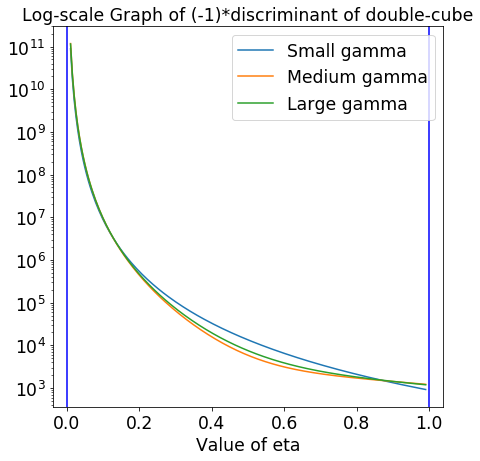

In [3]:
eta_range = np.linspace(start=0.01, stop=0.99, num=200)

myfig = plt.figure(figsize=(7,7))
ax_1 = myfig.add_subplot(1,1,1)

gamvals = [math.sqrt(2)/10, math.sqrt(2)/2, (math.sqrt(2)/2 - 0.1)]
gamlabels = ["Small gamma", "Medium gamma", "Large gamma"]

for i in range(len(gamvals)):
    
    gamval = gamvals[i]
    gamlabel = gamlabels[i]
    
    myA = lnk.coef_twocube_A(gam=gamval, eta=eta_range)
    myB = lnk.coef_twocube_B(gam=gamval, eta=eta_range)
    myC = lnk.coef_twocube_C(gam=gamval, eta=eta_range)
    myD = lnk.coef_twocube_D(gam=gamval, eta=eta_range)
    discrimvals = gtrt.discrim(a=myA, b=myB, c=myC, d=myD)
    
    print(gamlabel, "=", gamval)
    print("max =", np.max(discrimvals),
          "min =", np.min(discrimvals))
    print("--")
    
    ax_1.semilogy(eta_range, -discrimvals, "-", label=gamlabel)
    ax_1.tick_params(labelsize=FONTSIZE)

plt.title("Log-scale Graph of (-1)*discriminant of double-cube", size=FONTSIZE)
plt.xlabel("Value of eta", size=FONTSIZE)
plt.axvline(x=0.0, color="blue")
plt.axvline(x=1.0, color="blue")
ax_1.legend(loc=1,ncol=1, fontsize=FONTSIZE)
plt.show()

if saveImages:
    myfig.savefig(imgDir+"discrimvals_doublecube.pdf", bbox_inches="tight")

Next, we have the graph of the cubic polynomial itself (+root(s)).

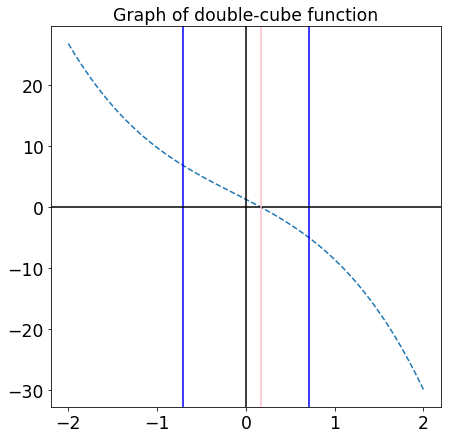

Value of P(ustar) = 1.7763568394002505e-15
Value of C_{eta}(ustar) = 0.22846483390112957


In [4]:

gamval = math.sqrt(2)/2
etaval = 0.6

myA = lnk.coef_twocube_A(gam=gamval, eta=etaval)
myB = lnk.coef_twocube_B(gam=gamval, eta=etaval)
myC = lnk.coef_twocube_C(gam=gamval, eta=etaval)
myD = lnk.coef_twocube_D(gam=gamval, eta=etaval)

xvals = np.linspace(start=-2, stop=2, num=200)

myfig = plt.figure(figsize=(7,7))

yvals = lnk.cube(x=xvals, a=myA, b=myB, c=myC, d=myD)

rootvals = gtrt.getroot(a=myA, b=myB, c=myC, d=myD)
if ( len(rootvals) == 1 ):
    rootval = rootvals[0]

ax_1 = myfig.add_subplot(1,1,1)
ax_1.plot(xvals, yvals, "--")
ax_1.tick_params(labelsize=FONTSIZE)
plt.title("Graph of double-cube function", size=FONTSIZE)
plt.axvline(x=gamval, color="blue")
plt.axvline(x=(-gamval), color="blue")
plt.axvline(x=0.0, color="black")
plt.axhline(y=0.0, color="black")
plt.axvline(x=rootval, color="pink")

plt.show()

print("Value of P(ustar) =", lnk.cube(x=rootval, a=myA, b=myB, c=myC, d=myD))
print("Value of C_{eta}(ustar) =", lnk.condPhiRisk(u=rootval, eta=etaval, gam=gamval))

if saveImages:
    myfig.savefig(imgDir+"graph_doublecube.pdf", bbox_inches="tight")

Next we have the value of the $H_{\gamma}(\eta)$ function over a range of $\eta$ values, given small enough $\gamma$.

Small gamma = 0.282842712474619
--
Medium gamma = 0.47140452079103173
--
Large gamma = 0.7071067811865476
--


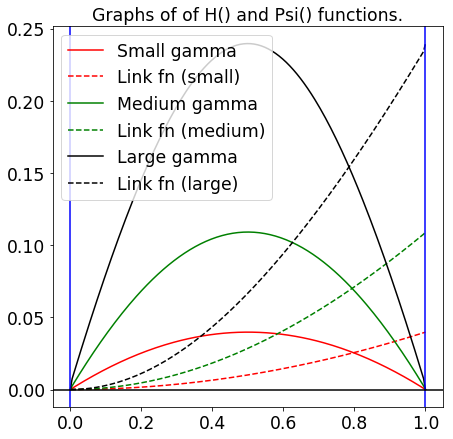

In [5]:

eta_range = np.linspace(start=0, stop=1, num=200)

myfig = plt.figure(figsize=(7,7))
ax_1 = myfig.add_subplot(1,1,1)

gamvals = [math.sqrt(2)/5, math.sqrt(2)/3, math.sqrt(2)/2]
gamlabels = ["Small gamma", "Medium gamma", "Large gamma"]
gamcolours = ["red", "green", "black"]
linklabels = ["Link fn (small)",
              "Link fn (medium)",
              "Link fn (large)"]

for i in range(len(gamvals)):
    
    gamval = gamvals[i]
    gamlabel = gamlabels[i]
    gamcolour = gamcolours[i]
    linklabel = linklabels[i]
    
    print(gamlabel, "=", gamval)
    print("--")
    
    Hvals = lnk.Hfn(eta=eta_range, gam=gamval)
    linkvals = lnk.linkfn(theta=eta_range, gam=gamval)
    ax_1.plot(eta_range, Hvals, "-", label=gamlabel, color=gamcolour)
    ax_1.plot(eta_range, linkvals, "--", label=linklabel, color=gamcolour)
    ax_1.tick_params(labelsize=FONTSIZE)

plt.axvline(x=0.0, color="blue")
plt.axvline(x=1.0, color="blue")
plt.axhline(y=0, color="black")
plt.title("Graphs of of H() and Psi() functions.", size=FONTSIZE)
ax_1.legend(loc=2,ncol=1, fontsize=FONTSIZE)
plt.show()

if saveImages:
    myfig.savefig(imgDir+"Hfn_Linkfn_simplecase.pdf", bbox_inches="tight")

One nice conclusion is that (as expected) the discriminant is always negative, and thus we easily can find solutions. Furthermore, the $H$ takes the concave form that we would expect from the cited literature.

<a id="largegamma"></a>
## Getting roots, more complicated case: $\gamma > \sqrt{2}/2$

Now we get into some computations related to the *single-cube* conditions. First, we look at how the discriminant of this function depends on $\gamma$ and $\eta$.

Small gamma = 0.8071067811865476
Medium gamma = 1.4142135623730951
Large gamma = 2.8284271247461903


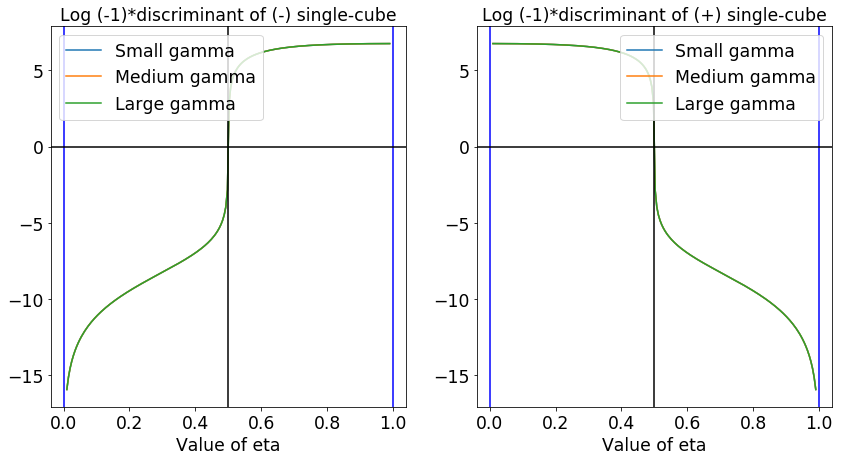

In [6]:
# PLOTS of quantities related to the single-cube conditions.

## 
eta_range = np.linspace(start=0.01, stop=0.99, num=200)
myfig = plt.figure(figsize=(14,7))

gamvals = [(math.sqrt(2)/2 + 0.1),
           math.sqrt(2),
           2*math.sqrt(2)]
gamlabels = ["Small gamma", "Medium gamma", "Large gamma"]
          

ax_1 = myfig.add_subplot(1,2,1)

for i in range(len(gamvals)):
    
    gamval = gamvals[i]
    gamlabel = gamlabels[i]
    
    myA = lnk.coef_onecubeminus_A(gam=gamval, eta=eta_range)
    myB = lnk.coef_onecubeminus_B(gam=gamval, eta=eta_range)
    myC = lnk.coef_onecubeminus_C(gam=gamval, eta=eta_range)
    myD = lnk.coef_onecubeminus_D(gam=gamval, eta=eta_range)
    discrimvals = gtrt.discrim(a=myA, b=myB, c=myC, d=myD)
    
    #print("max =", np.max(discrimvals))
    #print("min =", np.min(discrimvals))
    print(gamlabel, "=", gamval)
    
    ax_1.plot(eta_range,
              np.log(np.abs(discrimvals))*np.sign(discrimvals),
              "-", label=gamlabel)
    ax_1.tick_params(labelsize=FONTSIZE)

plt.title("Log (-1)*discriminant of (-) single-cube", size=FONTSIZE)
plt.xlabel("Value of eta", size=FONTSIZE)
plt.axvline(x=0.0, color="blue")
plt.axvline(x=1.0, color="blue")
plt.axhline(y=0.0, color="black")
plt.axvline(x=1/2, color="black")
ax_1.legend(loc=2,ncol=1, fontsize=FONTSIZE)

ax_2 = myfig.add_subplot(1,2,2)

for i in range(len(gamvals)):
    
    gamval = gamvals[i]
    gamlabel = gamlabels[i]
    
    myA = lnk.coef_onecubeplus_A(gam=gamval, eta=eta_range)
    myB = lnk.coef_onecubeplus_B(gam=gamval, eta=eta_range)
    myC = lnk.coef_onecubeplus_C(gam=gamval, eta=eta_range)
    myD = lnk.coef_onecubeplus_D(gam=gamval, eta=eta_range)
    discrimvals = gtrt.discrim(a=myA, b=myB, c=myC, d=myD)
    #print("max =", np.max(discrimvals))
    #print("min =", np.min(discrimvals))
    
    ax_2.plot(eta_range,
              np.log(np.abs(discrimvals))*np.sign(discrimvals),
              "-", label=gamlabel)
    ax_2.tick_params(labelsize=FONTSIZE)

plt.title("Log (-1)*discriminant of (+) single-cube", size=FONTSIZE)
plt.xlabel("Value of eta", size=FONTSIZE)
plt.axvline(x=0.0, color="blue")
plt.axvline(x=1.0, color="blue")
plt.axhline(y=0.0, color="black")
plt.axvline(x=1/2, color="black")
ax_2.legend(loc=1,ncol=1, fontsize=FONTSIZE)
plt.show()

if saveImages:
    myfig.savefig(imgDir+"discrimvals_singlecubes.pdf", bbox_inches="tight")

While the above graph can be a bit confusing (we have $\log(|\Delta|) \, \text{sign}(\Delta)$ displayed), it *does* show clearly that the discriminant of the cubic functions of interest here take both positive and negative values, which means we'll have to deal with *multiple roots*. Numerically, the value of $\gamma$ makes minimal difference to the discriminant.

Let's plot the graph of the cubic polynomial itself, along with roots determined using our function `getroot`, to ensure our root-finding mechanism works as we desire.

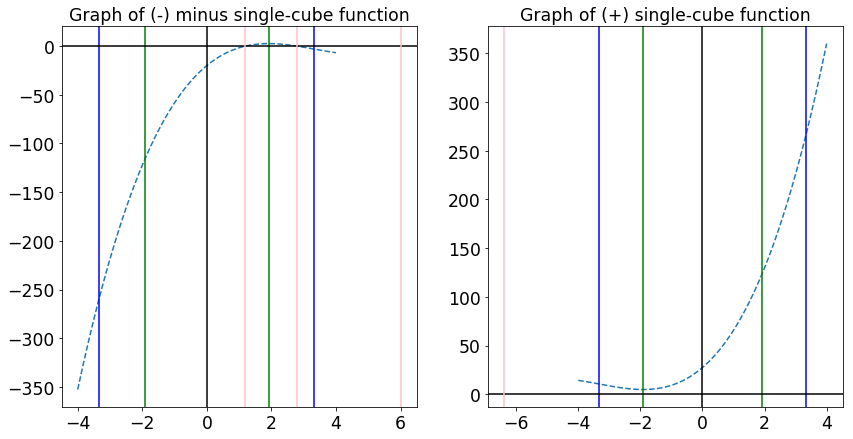

In [7]:

gamval = 2*math.sqrt(2) + 0.5
deltaval = math.fabs((math.sqrt(2) - gamval))
etaval = np.array([0.65])

xvals = np.linspace(start=-4, stop=4, num=200)

myfig = plt.figure(figsize=(14,7))

myA = lnk.coef_onecubeminus_A(gam=gamval, eta=etaval)
myB = lnk.coef_onecubeminus_B(gam=gamval, eta=etaval)
myC = lnk.coef_onecubeminus_C(gam=gamval, eta=etaval)
myD = lnk.coef_onecubeminus_D(gam=gamval, eta=etaval)
yvals = lnk.cube(x=xvals, a=myA, b=myB, c=myC, d=myD)
rootvals = gtrt.getroot(a=myA, b=myB, c=myC, d=myD)
rootvals = np.array(rootvals)
numroots = len(rootvals)

ax_1 = myfig.add_subplot(1,2,1)
ax_1.plot(xvals, yvals, "--")
ax_1.tick_params(labelsize=FONTSIZE)
plt.title("Graph of (-) minus single-cube function", size=FONTSIZE)
plt.axvline(x=gamval, color="blue")
plt.axvline(x=(-gamval), color="blue")
plt.axvline(x=0.0, color="black")
plt.axvline(x=deltaval, color="green")
plt.axvline(x=-deltaval, color="green")
plt.axhline(y=0.0, color="black")
for t in range(numroots):
    plt.axvline(x=rootvals[t], color="pink")

myA = lnk.coef_onecubeplus_A(gam=gamval, eta=etaval)
myB = lnk.coef_onecubeplus_B(gam=gamval, eta=etaval)
myC = lnk.coef_onecubeplus_C(gam=gamval, eta=etaval)
myD = lnk.coef_onecubeplus_D(gam=gamval, eta=etaval)
yvals = lnk.cube(x=xvals, a=myA, b=myB, c=myC, d=myD)
rootvals = gtrt.getroot(a=myA, b=myB, c=myC, d=myD)
rootvals = np.array(rootvals)
numroots = len(rootvals)

ax_2 = myfig.add_subplot(1,2,2)
ax_2.plot(xvals, yvals, "--")
ax_2.tick_params(labelsize=FONTSIZE)
plt.title("Graph of (+) single-cube function", size=FONTSIZE)
plt.axvline(x=gamval, color="blue")
plt.axvline(x=(-gamval), color="blue")
plt.axvline(x=0.0, color="black")
plt.axvline(x=deltaval, color="green")
plt.axvline(x=-deltaval, color="green")
plt.axhline(y=0.0, color="black")
for t in range(numroots):
    plt.axvline(x=rootvals[t], color="pink")
    
plt.show()

if saveImages:
    myfig.savefig(imgDir+"graph_singlecubes.pdf", bbox_inches="tight")

A brief legend:

- Dashed curve: graph of the relevant cubic polynomial.

- Solid vertical blue lines: $\pm \gamma$.

- Solid vertical green lines: $\pm \delta$, where $\delta = |\gamma - \sqrt{2}|$.

- Solid vertical pink lines: roots of the polynomial computed by `getroot`.

If appears that our root-finding mechanism is working well. Depending on whether $\eta > 1/2$ or $\eta < 1/2$, there always exists *at least* one root within the known feasible set of $[-\gamma,\gamma]$ for the relevant polynomial.

With this in mind, to complete our computation of $H$ and $\Psi$ for arbitrary settings, all that remains is for us to automatically determine *which* of these multiple roots is to be used. As is outlined in our more rigorous notes elsewhere, a few simple if/else conditions sort this all out.

0. Is $\gamma > \sqrt{2}$? If so, choose the root that satisfies $|u| \geq \delta$, while of course satisfying $\text{sign}(u) = \text{sign}(\eta - 1/2)$.

0. If $\gamma \leq \sqrt{2}$, then we need to check the condition ourselves. The quantity to compute is $Q = \rho^{\prime}(\delta - \gamma) / \rho^{\prime}(\delta + \gamma)$.

   0. In $\eta > 1/2$ case, check $Q < (\eta - 1)/\eta$.
   
   0. In $\eta < 1/2$ case, check $Q < \eta / (\eta-1)$. 
   
0. In either case, if the condition we check is TRUE, find a solution to the appropriate *single-cube* condition. If FALSE, then find the solution to the *double-cube* condition.

Let's try using this procedure, and see if it leads us reliably to the correct root.

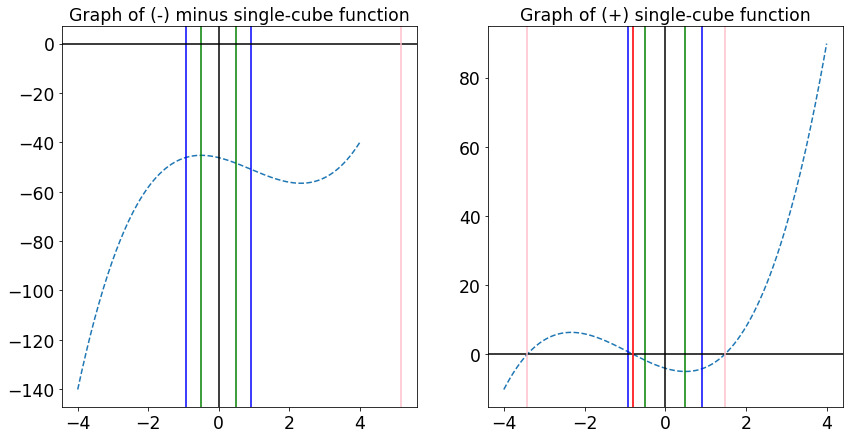

In [8]:
gamval = math.sqrt(2) - 0.5
deltaval = math.fabs((math.sqrt(2) - gamval))
etaval = np.array([0.1])

xvals = np.linspace(start=-4, stop=4, num=200)

myfig = plt.figure(figsize=(14,7))

myA = lnk.coef_onecubeminus_A(gam=gamval, eta=etaval)
myB = lnk.coef_onecubeminus_B(gam=gamval, eta=etaval)
myC = lnk.coef_onecubeminus_C(gam=gamval, eta=etaval)
myD = lnk.coef_onecubeminus_D(gam=gamval, eta=etaval)
yvals = lnk.cube(x=xvals, a=myA, b=myB, c=myC, d=myD)
rootvals = gtrt.getroot(a=myA, b=myB, c=myC, d=myD)
rootvals = np.array(rootvals)
numroots = len(rootvals)

ax_1 = myfig.add_subplot(1,2,1)
ax_1.plot(xvals, yvals, "--")
ax_1.tick_params(labelsize=FONTSIZE)
plt.title("Graph of (-) minus single-cube function", size=FONTSIZE)
plt.axvline(x=gamval, color="blue")
plt.axvline(x=(-gamval), color="blue")
plt.axvline(x=0.0, color="black")
plt.axvline(x=deltaval, color="green")
plt.axvline(x=-deltaval, color="green")
plt.axhline(y=0.0, color="black")
for t in range(numroots):
    plt.axvline(x=rootvals[t], color="pink")
if (etaval > 1/2):
    # Find the single solution root, and plot it in RED.
    if (gamval > math.sqrt(2)):
        rootval = np.copy(rootvals)
        rootval = rootval[(np.sign(rootval) == math.copysign(1.0,(etaval-1/2)))]
        rootval = rootval[np.abs(rootval) >= deltaval]
        rootval = rootval[np.abs(rootval) <= gamval]
        rootval = rootval[0] # should be just one left.
        plt.axvline(x=rootval, color="red")
    else:
        # Check which conditions are relevant in this case.
        Q = hlp.psi_catnew(deltaval-gamval) / hlp.psi_catnew(deltaval+gamval)
        if (Q < (etaval-1)/etaval):
            # Solving the single-cube condition is enough.
            rootval = np.copy(rootvals)
            rootval = rootval[(np.sign(rootval) == math.copysign(1.0,(etaval-1/2)))]
            rootval = rootval[np.abs(rootval) >= deltaval]
            rootval = rootval[np.abs(rootval) <= gamval]
            rootval = rootval[0] # should be just one left.
            plt.axvline(x=rootval, color="red")
        else:
            # None are relevant -- the double-cube condition should be solved.
            pass

myA = lnk.coef_onecubeplus_A(gam=gamval, eta=etaval)
myB = lnk.coef_onecubeplus_B(gam=gamval, eta=etaval)
myC = lnk.coef_onecubeplus_C(gam=gamval, eta=etaval)
myD = lnk.coef_onecubeplus_D(gam=gamval, eta=etaval)
yvals = lnk.cube(x=xvals, a=myA, b=myB, c=myC, d=myD)
rootvals = gtrt.getroot(a=myA, b=myB, c=myC, d=myD)
rootvals = np.array(rootvals)
numroots = len(rootvals)

ax_2 = myfig.add_subplot(1,2,2)
ax_2.plot(xvals, yvals, "--")
ax_2.tick_params(labelsize=FONTSIZE)
plt.title("Graph of (+) single-cube function", size=FONTSIZE)
plt.axvline(x=gamval, color="blue")
plt.axvline(x=(-gamval), color="blue")
plt.axvline(x=0.0, color="black")
plt.axvline(x=deltaval, color="green")
plt.axvline(x=-deltaval, color="green")
plt.axhline(y=0.0, color="black")
for t in range(numroots):
    plt.axvline(x=rootvals[t], color="pink")
if (etaval < 1/2):
    # Find the single solution root, and plot it in RED.
    if (gamval > math.sqrt(2)):
        rootval = np.copy(rootvals)
        rootval = rootval[(np.sign(rootval) == math.copysign(1.0,(etaval-1/2)))]
        rootval = rootval[np.abs(rootval) >= deltaval]
        rootval = rootval[np.abs(rootval) <= gamval]
        rootval = rootval[0] # should be just one left.
        plt.axvline(x=rootval, color="red")
    else:
        # Check which conditions are relevant in this case.
        Q = hlp.psi_catnew(deltaval-gamval) / hlp.psi_catnew(deltaval+gamval)
        if (Q < etaval/(etaval-1)):
            # Solving the single-cube condition is enough.
            rootval = np.copy(rootvals)
            rootval = rootval[(np.sign(rootval) == math.copysign(1.0,(etaval-1/2)))]
            rootval = rootval[np.abs(rootval) >= deltaval]
            rootval = rootval[np.abs(rootval) <= gamval]
            rootval = rootval[0] # should be just one left.
            plt.axvline(x=rootval, color="red")
        else:
            # None are relevant -- the double-cube condition should be solved.
            pass

plt.show()

if saveImages:
    myfig.savefig(imgDir+"graph_singlecubes_withroot.pdf", bbox_inches="tight")

Note how in the above routines, we have incorporated all the relevant conditions such that a red vertical line is used to highlight the *valid* root that we seek from the single-cube functions. Getting the root from the double-cube functions is easy, and was handled in the previous section.

The above tests (tried over a wide variety of $\gamma$ and $\eta$ values) show that in addition to the correct root-finding procedure, we can isolate which of the conditions to solve, and which of the potentially multiple roots to use, since only one will be relevant in the context of computing $H(\eta)$ and $\Psi(\theta)$.

<a id="Hfn"></a>
## Actual computation of desired functions ($H$ and $\Psi$)

In the previous sections, we covered all possible $\gamma$ and $\eta$ settings such that we can find the roots of cubic polynomials needed for the computation of $H$ and $\Psi$.

We have implemented these functions as `Hfn` and `linkfn` respectively, both contained in the `linker.py` file. Here we plot these functions over their domain.

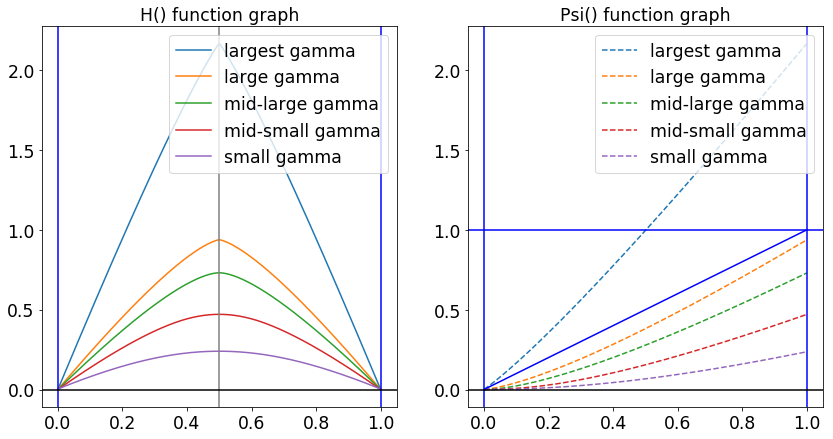

In [9]:
# Final computations of the H(eta) function in the general gamma case.
eta_range = np.linspace(start=0, stop=1.0, num=500)

myfig = plt.figure(figsize=(14,7))

ax_1 = myfig.add_subplot(1,2,1)

gamvals = [2*math.sqrt(2),
           math.sqrt(2)+0.11,
           math.sqrt(2)-0.11,
           math.sqrt(2)-0.4,
           math.sqrt(2)/2]
gamlabels = ["largest gamma",
             "large gamma",
             "mid-large gamma",
             "mid-small gamma",
             "small gamma"]

for i in range(len(gamvals)):
    
    gamval = gamvals[i]
    gamlabel = gamlabels[i]
    
    Hvals = lnk.Hfn(eta=eta_range, gam=gamval)
    ax_1.plot(eta_range, Hvals, "-", label=gamlabel)
    ax_1.tick_params(labelsize=FONTSIZE)

plt.axvline(x=0.0, color="blue")
plt.axvline(x=0.5, color="grey")
plt.axvline(x=1.0, color="blue")
plt.axhline(y=0, color="black")
plt.title("H() function graph", size=FONTSIZE)
ax_1.legend(loc=1,ncol=1, fontsize=FONTSIZE)


ax_2 = myfig.add_subplot(1,2,2)

for i in range(len(gamvals)):
    
    gamval = gamvals[i]
    gamlabel = gamlabels[i]
    
    linkvals = lnk.linkfn(theta=eta_range, gam=gamval)
    ax_2.plot(eta_range, linkvals, "--", label=gamlabel)
    ax_2.tick_params(labelsize=FONTSIZE)


ax_2.plot(eta_range, eta_range, "-", color="blue") # identity graph

plt.axvline(x=0.0, color="blue")
plt.axvline(x=1.0, color="blue")
plt.axhline(y=0.0, color="black")
plt.axhline(y=1.0, color="blue")
plt.title("Psi() function graph", size=FONTSIZE)
ax_2.legend(loc=1,ncol=1, fontsize=FONTSIZE)

plt.show()


if saveImages:
    myfig.savefig(imgDir+"Hfn_Linkfn_generalcase.pdf", bbox_inches="tight")

Finally, from the perspective of providing learning guarantees, we are naturally interested in tradeoffs induced by modifying the value of $\gamma$. Intuitively, we would expect that for the same excess surrogate risk (say $a$, matching figures below), achieving it with a larger $\gamma$ is "harder", and thus the resulting excess risk should be as good or better than in cases of achieving $a$ with smaller $\gamma$ settings. The following experiments highlight this monotonicity, as expected.

In [10]:
# Compute how the value of gamma impacts output.
# Note: takes a bit of time to compute.

eta_range = np.linspace(start=0, stop=1.0, num=2500)
gam_min = math.sqrt(2)/2
gam_max = 2*math.sqrt(2)
gam_range = np.linspace(gam_min, gam_max, 500)

mydict = {}
a_vals = [0.1, 0.01, 0.001]
for a in a_vals:
    out = np.zeros(gam_range.shape, dtype=np.float32)
    
    for i in range(gam_range.size):
        gamval = gam_range[i]
        y_vals = lnk.linkfn(theta=eta_range, gam=gamval, s=1.0)
        idx = np.nonzero(((y_vals-a) >= 0))[0][0] - 1
        out[i] = eta_range[idx]
    
    mydict[str(a)] = out

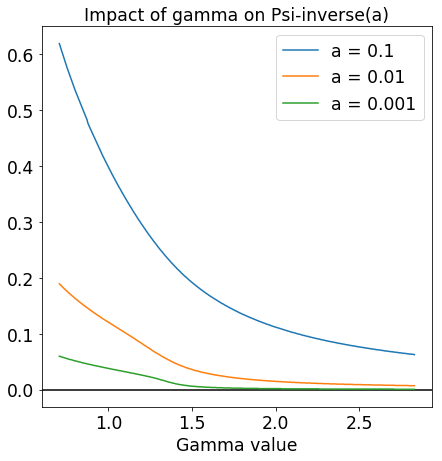

In [11]:
# Plot these results:
myfig = plt.figure(figsize=(7,7))
ax_1 = myfig.add_subplot(1,1,1)
plt.axhline(y=0.0, color="black")
#plt.axvline(x=0.0, color="black")
plt.title("Impact of gamma on Psi-inverse(a)", size=FONTSIZE)
plt.xlabel("Gamma value", size=FONTSIZE)
for a in a_vals:
    ax_1.plot(gam_range, mydict[str(a)], label=("a = "+str(a)))
ax_1.tick_params(labelsize=FONTSIZE)
ax_1.legend(loc=1,ncol=1, fontsize=FONTSIZE)
plt.show()

if saveImages:
    myfig.savefig(imgDir+"gamma_inversePsi.pdf", bbox_inches="tight")

Next we would like to consider the impact of $s>0$ in setting a loss $\phi(u) = s^2 \,\rho((\gamma-u)/s)$. This is easy via the `s` argument of`linkfn`.

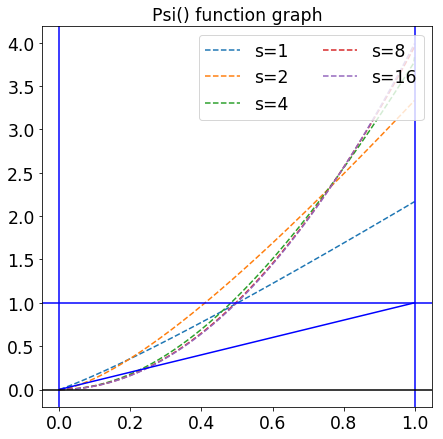

In [12]:
# Computations of the link function over a fixed range, for fixed
# gamma value, with varying s values.

# Final computations of the H(eta) function in the general gamma case.
eta_range = np.linspace(start=0, stop=1.0, num=500)
gamval = 2*math.sqrt(2)
svals = [1, 2, 4, 8, 16]
slabels = ["s=1", "s=2", "s=4", "s=8", "s=16"]

myfig = plt.figure(figsize=(7,7))

ax_1 = myfig.add_subplot(1,1,1)

for i in range(len(svals)):
    
    sval = svals[i]
    slabel = slabels[i]
    
    linkvals = lnk.linkfn(theta=eta_range, gam=gamval, s=sval)
    ax_1.plot(eta_range, linkvals, "--", label=slabel)
    ax_1.tick_params(labelsize=FONTSIZE)


ax_1.plot(eta_range, eta_range, "-", color="blue") # identity graph

plt.axvline(x=0.0, color="blue")
plt.axvline(x=1.0, color="blue")
plt.axhline(y=0.0, color="black")
plt.axhline(y=1.0, color="blue")
plt.title("Psi() function graph", size=FONTSIZE)
ax_1.legend(loc=1,ncol=2, fontsize=FONTSIZE)

plt.show()


if saveImages:
    myfig.savefig(imgDir+"Linkfn_over_s.pdf", bbox_inches="tight")

Finally, we look at $\Psi_{s,\gamma}^{-1}(\varepsilon/s)$ as a function of $s$.

In [13]:
# Compute how the value of gamma AND s impacts output.

eta_range = np.linspace(start=0, stop=1.0, num=5000)
s_range = np.linspace(start=1.0, stop=15.0, num=250)
epsilon = 0.5

gamvals = [3*math.sqrt(2),
           2*math.sqrt(2),
           math.sqrt(2)]
gamlabels = ["gam=3*sqrt(2)",
             "gam=2*sqrt(2)",
             "gam=1*sqrt(2)"]

perf_dict = {}

for i in range(len(gamvals)):
    
    gamval = gamvals[i]
    gamlabel = gamlabels[i]

    out = np.zeros(s_range.shape, dtype=np.float32)
    
    for j in range(s_range.size):
        sval = s_range[j]

        upperbd = epsilon/sval
        rangemax = sval*hlp.rho_catnew(gamval/sval)
        if (upperbd <= rangemax):
            sanity = "OK"
        else:
            sanity = "FAIL"

        y_vals = lnk.linkfn(theta=eta_range, gam=gamval, s=sval)
        idx = np.nonzero(((y_vals-epsilon/sval) >= 0))[0][0] - 1
        out[j] = eta_range[idx]

        #print("Sanity check:", sanity,
        #      "; max val =", rangemax,
        #      "; upperbd =", upperbd)
        
    perf_dict[gamlabel] = out # Store output.
    
    

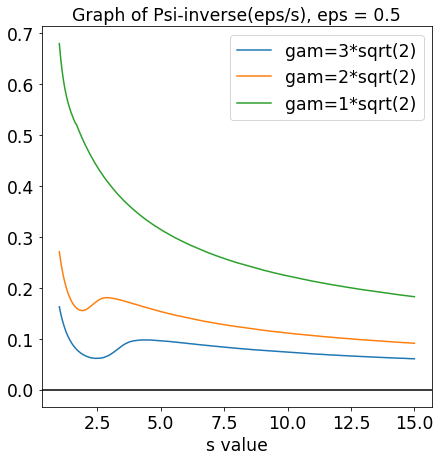

In [14]:
# Plot these results:
myfig = plt.figure(figsize=(7,7))
ax_1 = myfig.add_subplot(1,1,1)
plt.axhline(y=0.0, color="black")
#plt.axvline(x=0.0, color="black")
plt.title("Graph of Psi-inverse(eps/s), eps = "+str(epsilon),
          size=FONTSIZE)
plt.xlabel("s value", size=FONTSIZE)
for gamlabel in gamlabels:
    ax_1.plot(s_range, perf_dict[gamlabel], label=gamlabel)
ax_1.tick_params(labelsize=FONTSIZE)
ax_1.legend(loc=1, ncol=1, fontsize=FONTSIZE)
plt.show()

if saveImages:
    myfig.savefig(imgDir+"inversePsi_over_s.pdf", bbox_inches="tight")

___